In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [17]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [20]:
# Why we use Label encodeer ?
# We use label encoder becasue we want convert text into numerical value 

from sklearn.preprocessing import LabelEncoder
encodeer = LabelEncoder()

In [21]:
# Example 
data = ['yes','no']
encodeer.fit_transform(data)

array([1, 0], dtype=int64)

In [25]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split

# Slelect data and seprate train and predict data
X = df.drop(' loan_status',axis=1)
y = df[' loan_status']

# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
# Apply Label Encoder
X_train[' education'] = encodeer.fit_transform(X_train[' education'])
X_train[' self_employed'] = encodeer.fit_transform(X_train[' self_employed'])

In [60]:
X_train.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
921,922,3,1,1,2100000,6100000,8,346,5500000,600000,4500000,2900000
3119,3120,4,1,0,9800000,29400000,8,592,29100000,16700000,35900000,9000000
3975,3976,2,0,1,6100000,22300000,8,694,16200000,10900000,22900000,7200000


In [106]:
y_train_label = encodeer.fit_transform(y_train)
y_train_label = np.array(y_train_label)
y_train_label = y_train_label.reshape(-1,1)

In [109]:
y_train_label

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [88]:
y_test_label = encodeer.fit_transform(y_test)
y_test_label = np.array(y_test_label)
y_test_label = y_test_label.reshape(-1,1)

In [89]:
y_test_label

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [90]:
print('Shape : ',y_test_label.shape)
print('Shape : ',y_test.shape)

Shape :  (1409, 1)
Shape :  (1409,)


In [70]:
# Apply Label Encoder On Test Data
X_test[' education'] = encodeer.fit_transform(X_test[' education'])
X_test[' self_employed'] = encodeer.fit_transform(X_test[' self_employed'])
X_test.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1703,1704,5,0,0,5400000,19700000,20,423,6500000,10000000,15700000,7300000
1173,1174,2,0,0,5900000,14000000,8,599,4700000,9500000,17800000,6700000
308,309,3,0,0,9600000,19900000,14,452,4200000,16200000,28500000,6600000
1322,1323,2,0,0,6200000,23400000,8,605,10000000,10800000,21800000,9200000
3271,3272,3,1,1,5800000,14100000,12,738,11700000,4400000,15400000,8400000


In [61]:
from sklearn.tree import DecisionTreeClassifier
classfier = DecisionTreeClassifier()

In [66]:
classfier.fit(X_train,y_train_label)

DecisionTreeClassifier()

In [71]:
y_pred = classfier.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [92]:
print(accuracy_score(y_test_label,y_pred))
print(confusion_matrix(y_test_label,y_pred))
print(classification_report(y_test_label,y_pred))

0.9779985805535841
[[873  14]
 [ 17 505]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       887
           1       0.97      0.97      0.97       522

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409



<Axes: >

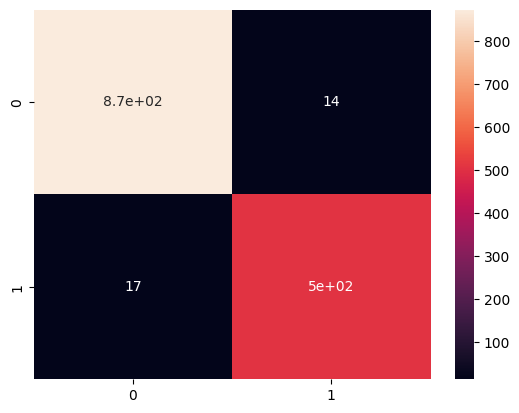

In [94]:
sns.heatmap(confusion_matrix(y_test_label,y_pred),annot=True)

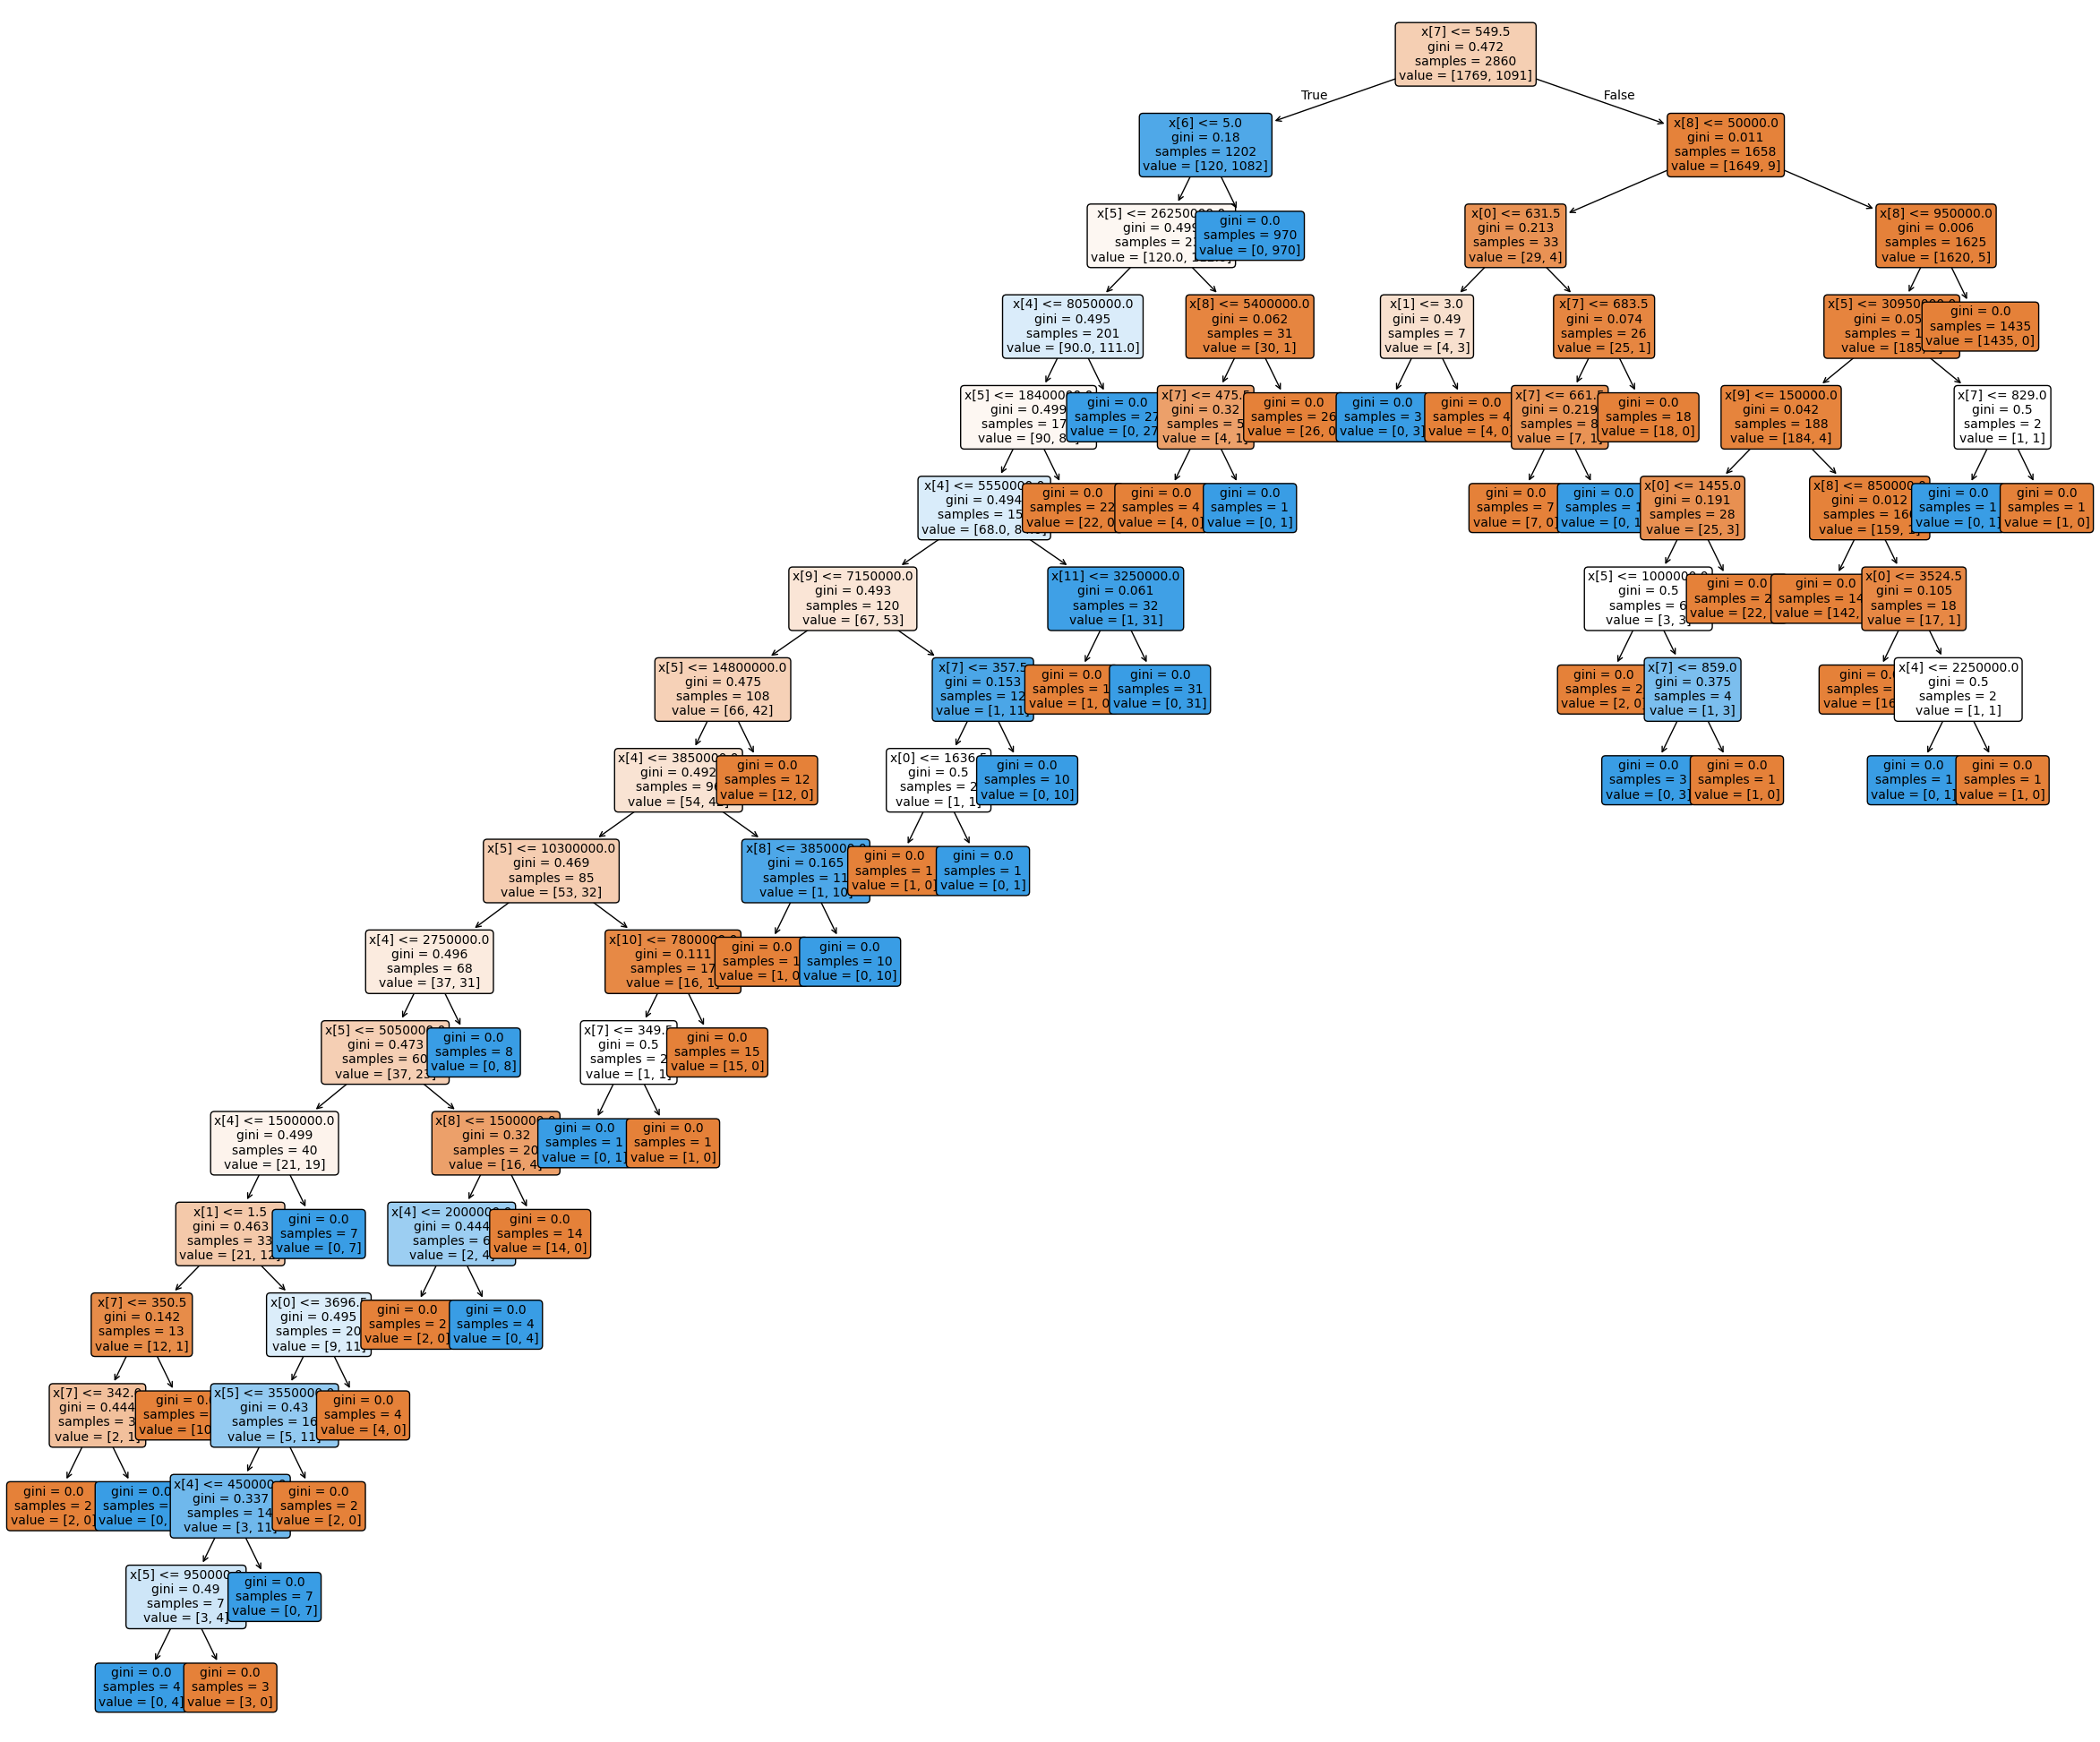

In [102]:
# Lets Draw Tree
from sklearn import tree
plt.figure(figsize=(30, 25))  
tree.plot_tree(classfier, 
               filled=True,        
               rounded=True,       
               fontsize=10)        
plt.show()

# **Hyper para Meter Tunning**
Lets Decrease the over fitting using pretunning and apply  Grid Search CV

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth' : [1,5,10,15,20,25,30],
    'max_features': ['auto','sqrt', 'log2']
}
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt', 'log2']}

In [105]:
grid = GridSearchCV(classfier,param_grid=param,cv=5,scoring='accuracy')

In [110]:
grid.fit(X_train,y_train_label)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [111]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 25,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [112]:
grid.best_score_

0.9604895104895105

In [114]:
y_pred = grid.predict(X_test)

In [115]:
print(accuracy_score(y_test_label,y_pred))
print(confusion_matrix(y_test_label,y_pred))
print(classification_report(y_test_label,y_pred))

0.9602555003548616
[[854  33]
 [ 23 499]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       887
           1       0.94      0.96      0.95       522

    accuracy                           0.96      1409
   macro avg       0.96      0.96      0.96      1409
weighted avg       0.96      0.96      0.96      1409



In [116]:
# In This Dataset we have many feature so we can reduce using apply PCA
# PCA Is a Machine Learning ALgorihtim That can reduce length of data with reducing the data feature